---
authors: Freek Pols
updated: december 3, 2025
---
# Bepaling van warmtecapaciteit van een onbekend materiaal


# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal
- Water
- Maatcilinder of maatbeker


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

# Resultaten

In deze sectie wordt uit de meetdata de soortelijke warmte $c$ van het onbekende blokje bepaald met de energiebalans uit de theorie.
De meetdata staan in het meegeleverde Excel-bestand (7 herhalingen).

We nemen aan dat:
- het blokje in het hete water dezelfde begintemperatuur heeft als $T_{blokje}$ (temperatuur van het hete water),
- warmteverlies aan de omgeving en de warmtecapaciteit van de calorimeter verwaarloosbaar zijn.


,Meting,M_water_gram,M_blokje_gram,T_water_begin,T_blokje,ΔT,T_e (°C),c_blokje (J/kgK)
0,1,307.30,101.80,20.6,69,1.6,22.2,432.0
1,2,218.00,100.00,20.3,67,2.3,22.6,472.7
2,3,229.10,100.60,20.2,69,2.6,22.8,536.5
3,4,137.50,50.20,21.2,67,1.9,23.1,496.2
4,5,331.08,49.95,22.5,67,0.7,23.2,443.4
5,6,283.24,100.00,22.5,67,0.7,23.2,189.5
6,7,296.80,51.10,20.6,69,1.0,21.6,512.9


Gemiddelde (alle 7): 440.5 J/kgK
Standaardafwijking (alle 7): 116.7 J/kgK

Mogelijke uitschieter(s) gevonden (|z|>2) bij meting(en): 6
Gemiddelde (zonder uitschieter): 482.3 J/kgK
Standaardafwijking (zonder uitschieter): 40.5 J/kgK

Dichtstbijzijnde typische materialen (o.b.v. gemiddelde alle 7):
- ijzer/staal:  450 J/kgK (verschil 10)
- zink      :  388 J/kgK (verschil 52)
- koper     :  385 J/kgK (verschil 55)
- messing   :  380 J/kgK (verschil 60)


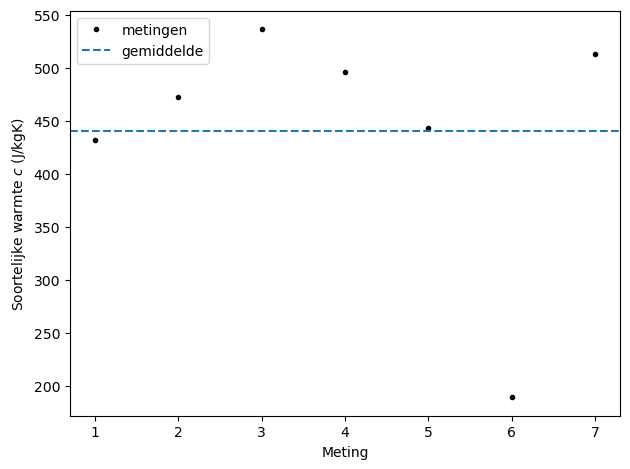

In [11]:
import pandas as pd
import numpy as np
from pathlib import Path

# Inlezen meetdata (Excel)
excel_file = Path("soortelijke warmte onbekende stof.xlsx")
if not excel_file.exists():
    excel_file = Path("/mnt/data/soortelijke warmte onbekende stof.xlsx")

df = pd.read_excel(excel_file, sheet_name="data")

# Maak de metingen herkenbaar (1 t/m 7)
df.insert(0, "Meting", np.arange(1, len(df) + 1))

# Constante: soortelijke warmte water
c_water = 4186  # J/(kg·K)

# Afgeleide grootheden
df["m_water (kg)"]  = df["M_water_gram"] / 1000
df["m_blokje (kg)"] = df["M_blokje_gram"] / 1000

# Eindtemperatuur water (equilibrium): T_e = T_water_begin + ΔT
df["T_e (°C)"] = df["T_water_begin"] + df["ΔT"]

# Energiebalans:
# m_blokje*c_blokje*(T_e - T_blokje) + m_water*c_water*(T_e - T_water_begin) = 0
# -> c_blokje = m_water*c_water*ΔT / (m_blokje*(T_blokje - T_e))
df["c_blokje (J/kgK)"] = (
    df["m_water (kg)"] * c_water * df["ΔT"]
    / (df["m_blokje (kg)"] * (df["T_blokje"] - df["T_e (°C)"]))
)

# Netjes overzicht
cols_show = ["Meting", "M_water_gram", "M_blokje_gram", "T_water_begin", "T_blokje", "ΔT", "T_e (°C)", "c_blokje (J/kgK)"]
df_show = df[cols_show].copy()
df_show["c_blokje (J/kgK)"] = df_show["c_blokje (J/kgK)"].round(1)
df_show["T_e (°C)"] = df_show["T_e (°C)"].round(1)

display(df_show)

# Statistiek
c_vals = df["c_blokje (J/kgK)"].to_numpy()
mean_all = c_vals.mean()
std_all  = c_vals.std(ddof=1)

# Detecteer een mogelijke uitschieter met z-score (alleen ter indicatie)
z = (c_vals - mean_all) / std_all
outlier_idx = np.where(np.abs(z) > 2)[0]  # indices in array

print(f"Gemiddelde (alle 7): {mean_all:.1f} J/kgK")
print(f"Standaardafwijking (alle 7): {std_all:.1f} J/kgK")

if len(outlier_idx) > 0:
    # Bereken ook gemiddelde zonder de uitschieter(s)
    mask = np.ones_like(c_vals, dtype=bool)
    mask[outlier_idx] = False
    mean_wo = c_vals[mask].mean()
    std_wo  = c_vals[mask].std(ddof=1)

    print("\nMogelijke uitschieter(s) gevonden (|z|>2) bij meting(en):",
          ", ".join(str(int(df.loc[i, 'Meting'])) for i in outlier_idx))
    print(f"Gemiddelde (zonder uitschieter): {mean_wo:.1f} J/kgK")
    print(f"Standaardafwijking (zonder uitschieter): {std_wo:.1f} J/kgK")

# Snelle vergelijking met typische materialen (indicatief)
typisch = {
    "aluminium": 900,
    "koper": 385,
    "messing": 380,
    "ijzer/staal": 450,
    "lood": 128,
    "zink": 388,
    "tin": 230,
}
# Sorteer op afstand tot gemiddelde (alle 7)
closest = sorted(typisch.items(), key=lambda kv: abs(kv[1] - mean_all))
print("\nDichtstbijzijnde typische materialen (o.b.v. gemiddelde alle 7):")
for mat, c in closest[:4]:
    print(f"- {mat:10s}: {c:4d} J/kgK (verschil {abs(c - mean_all):.0f})")
    
metingen = df["Meting"]
c_vals = df["c_blokje (J/kgK)"]

plt.figure()
plt.xlabel("Meting")
plt.ylabel(r"Soortelijke warmte $c$ (J/kgK)")
plt.plot(metingen, c_vals, "k.", label="metingen")

# Gemiddelde lijn
plt.axhline(c_vals.mean(), linestyle="--", label="gemiddelde")

plt.legend()
plt.tight_layout()

plt.show()


```{figure} figures/c_blokje.png
:width: 70%
:label: fig_c_blokje

Berekende soortelijke warmte $c$ per meting. De gestreepte lijn geeft het gemiddelde.
```

# Discussie en conclusie

Uit de energiebalans volgt voor elke meting een waarde voor de soortelijke warmte van het onbekende blokje. 
De spreiding tussen metingen komt vooral door (i) warmteverlies aan de omgeving tijdens het overgieten/roeren, 
(ii) het feit dat het blokje niet perfect op $T_{blokje}$ hoeft te starten, en (iii) meetonnauwkeurigheden in massa en temperatuur.

Een (zeer) lage $\Delta T$ geeft relatief veel onzekerheid; daarom kan één meting duidelijk afwijken. 
In de analyse is daarom zowel het gemiddelde van alle 7 metingen getoond als (indien gedetecteerd) een gemiddelde zonder duidelijke uitschieter.

Op basis van de orde van grootte (en vergelijking met typische waarden) ligt het materiaal het meest in de buurt van **ijzer/staal** (ongeveer 450–500 J/kgK).
